In [28]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#read data
df=pd.read_csv(r"/content/Maternal Health Risk Data Set.csv")

In [30]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [31]:
#drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

<Axes: >

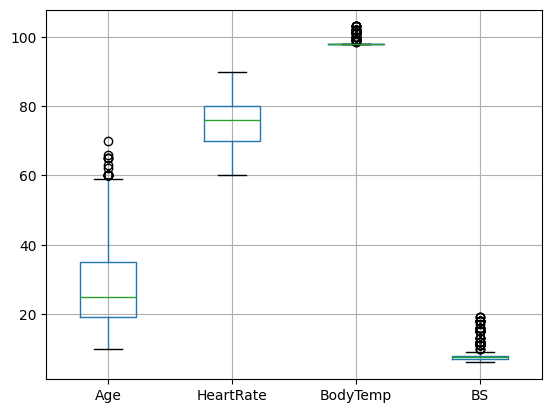

In [48]:
#boxplot
df.boxplot(column=['Age','HeartRate','BodyTemp','BS'])

In [46]:
#knowing data
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_encoded
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,0.0
mean,29.194690,110.553097,75.418142,8.346173,98.692478,74.088496,NaN
std,13.767379,17.872282,13.754578,2.829209,1.410897,7.524161,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000,NaN
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,NaN
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,NaN


Text(0.5, 1.0, 'Distribution of Heart Rate')

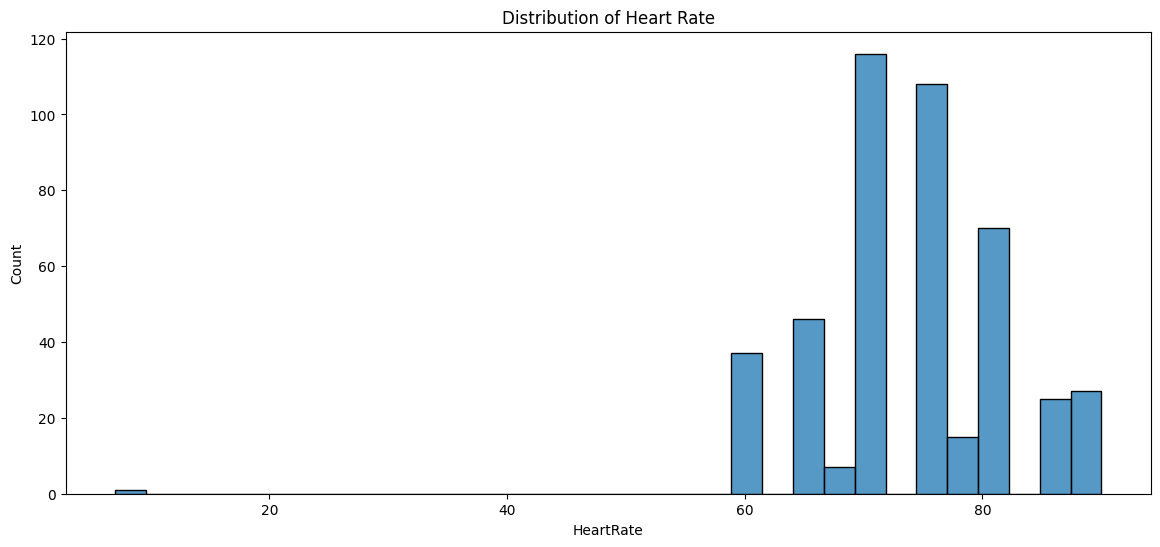

In [42]:
#Histogram for Heart Rate
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(14,6))

sns.histplot(ax=axes, x=df.HeartRate)
axes.set_title("Distribution of Heart Rate")


Text(0.5, 1.0, 'Distribution of BodyTemp')

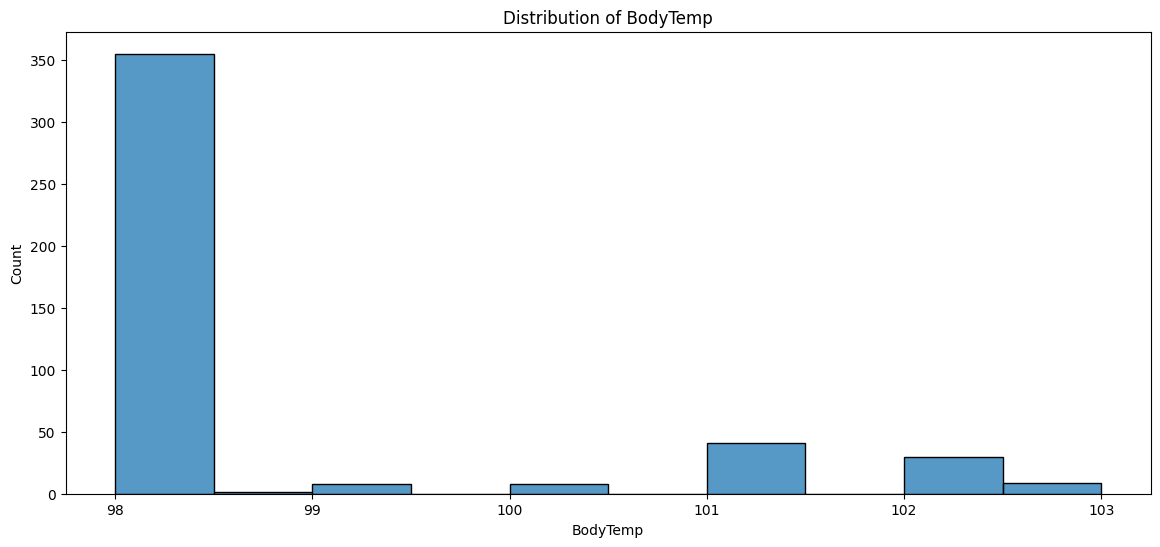

In [41]:
#Histogram for Body Temperature
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(14,6))

sns.histplot(ax=axes, x=df.BodyTemp)
axes.set_title("Distribution of BodyTemp")

Text(0.5, 1.0, 'Distribution of Blood glucose ')

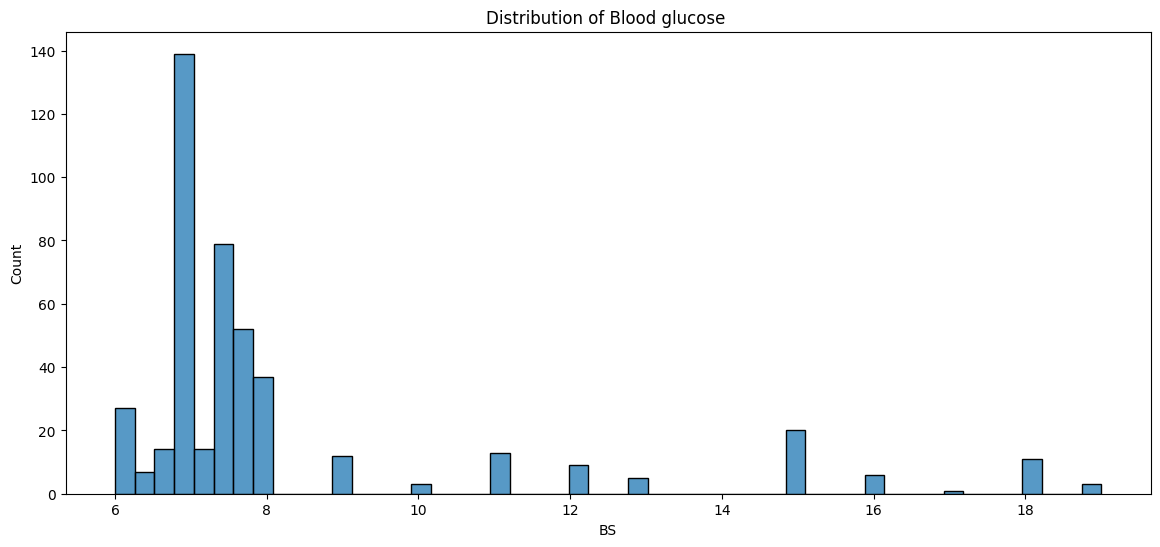

In [39]:
#Histogram for Blood Glucose Level
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(14,6))

sns.histplot(ax=axes, x=df.BS)
axes.set_title("Distribution of Blood glucose ")



In [45]:
#Classification Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.75      0.67      0.71        18
    low risk       0.66      0.87      0.75        47
    mid risk       0.46      0.23      0.31        26

    accuracy                           0.65        91
   macro avg       0.62      0.59      0.59        91
weighted avg       0.62      0.65      0.62        91

[[12  3  3]
 [ 2 41  4]
 [ 2 18  6]]
